## How to analyse a (Stytra) freely-swimming tracking experiment

In this tutorial we show how to use bouter to analyse data that was aquired with [Stytra](http://www.portugueslab.com/stytra/).

First, some imports:

In [1]:
from bouter import FreelySwimmingExperiment
from bouter import ASSETS_PATH

Given a folder containing data from a Stytra experiment, it's very easy to instantiate an `Experiment` object. Here we use example bouter data, otherwise replace the path with the folder to your data:

In [2]:
experiment_data_path = ASSETS_PATH / "freely_swimming_dataset"

# Initialize the experiment:
exp = FreelySwimmingExperiment(experiment_data_path)

## The `Experiment` class

`Experiment` objects are objects that behaves like dictionariers with extended magical properties. 

They have keys, reflecting the Stytra metadata:

In [3]:
print(exp.keys())

dict_keys(['camera_params', 'general', 'gui', 'stimulus', 'tracking+bgsub', 'tracking+fish_tracking', 'tracking+source', 'behavior'])


And looking inside these keys, we found Stytra hierarchical data log:

In [4]:
print(exp["general"]["animal"])

{'age': 7, 'comments': '', 'dish_diameter': '90', 'embedded': False, 'genotype': 'TL', 'id': 1, 'screened': 'not', 'species': 'Danio Rerio', 'treatment': ''}


In addition, there are some values (*properties*) that are computed from the metadata, invoked in this way:

In [5]:
# sampling dt of the behavioral tracking
exp.behavior_dt

0.005946131313131322

There's several useful properties. E.g.

* Fish id from folder:

In [6]:
exp.fish_id 

'190702_f1'

* Unique id for the experiment:

In [7]:
exp.full_name

'190702_f1_162934'

* Protocol name:

In [8]:
exp.protocol_name 

'E0032_luminance_v4_steps_freefish'

* Simplified protocol parameters dict:

There's also a couple properties unique to freely-swimming experiments:

* Number of fish simultaneously-tracked during the experiment:

In [9]:
exp.n_fish

3

* Pixel scale (in mm):

In [10]:
exp.camera_px_in_mm

0.0574391781819578

## The behavioural logs

The bulk of the behavioural data is contained in the stytra log files.
With properties you can look at the logs of the experiments, returned as `pd.DataFrame`s; depending on what experiment you run you'll find for example:

 * `Experiment.stimulus_param_log`: the dynamic log of stytra stimulus

In [11]:
exp.stimulus_param_log.head()

,flash_luminance,flash_current_phase,t
0,0.321569,3,0.032209
1,0.321569,3,0.043202
2,0.321569,3,0.082181
3,0.321569,3,0.096173
4,0.321569,3,0.136150


 * `Experiment.behavior_log`: the dynamic log of the tracked tail (or eye, position, etc.):

In [12]:
exp.behavior_log.head()

,f0_x,f0_vx,f0_y,f0_vy,f0_theta,f0_vtheta,f0_theta_00,f0_theta_01,f0_theta_02,f0_theta_03,...,f2_theta_01,f2_theta_02,f2_theta_03,f2_theta_04,f2_theta_05,f2_theta_06,f2_theta_07,f2_theta_08,biggest_area,t
0,41.546274,0.007476,350.896564,0.004628,-4.746267,0.000974,0.036654,-0.021526,-0.001781,-0.009501,...,-0.016728,-0.023253,0.014678,0.020809,-0.009445,-0.055805,-0.043146,-0.034646,620.0,0.001227
1,41.542469,0.002044,350.829042,-0.030117,-4.744876,0.001175,0.032205,-0.012167,-0.004461,-0.014391,...,-0.021440,-0.018496,0.017306,0.017805,-0.008430,-0.024853,-0.024479,-0.028084,628.0,0.006224
2,41.531554,-0.004196,350.790006,-0.034412,-4.759510,-0.006438,0.073544,-0.009692,0.024183,0.010462,...,0.032950,0.006999,0.021144,0.033250,-0.004284,-0.026720,-0.029375,0.007819,620.0,0.012220
3,41.546247,0.004899,350.858182,0.014991,-4.751920,0.000318,0.024109,-0.004673,0.002057,0.002295,...,0.044432,-0.026206,0.016509,0.022831,0.002999,-0.020768,-0.020675,-0.041094,624.0,0.017218
4,41.556303,0.007383,350.799283,-0.020592,-4.754406,-0.001033,0.061924,-0.005466,-0.001543,-0.004187,...,-0.012961,-0.009367,0.014739,0.038174,-0.002141,-0.035898,-0.012279,-0.028410,632.0,0.023215


### Filter the tail log

Sometimes, Stytra's tail-tracking can miss the last tail segments. This can be fixed using a custom interpolation function (`reconstruct_missing_segments`), which uses n=`continue_curvature` tracked segments to average the difference of consecutive segments and fill the nan values using the same incremental difference. This in general is safe as long as the tail tracking was not completely off.

To use it, before using the behavior log, run the following:

In [13]:
exp.reconstruct_missing_segments(continue_curvature=4)
exp.behavior_log.head()

,f0_x,f0_vx,f0_y,f0_vy,f0_theta,f0_vtheta,f0_theta_00,f0_theta_01,f0_theta_02,f0_theta_03,...,f2_theta_04,f2_theta_05,f2_theta_06,f2_theta_07,f2_theta_08,biggest_area,t,f0_missing_n,f1_missing_n,f2_missing_n
0,41.546274,0.007476,350.896564,0.004628,-4.746267,0.000974,0.036654,-0.021526,-0.001781,-0.009501,...,0.020809,-0.009445,-0.055805,-0.043146,-0.034646,620.0,0.001227,0,0,0
1,41.542469,0.002044,350.829042,-0.030117,-4.744876,0.001175,0.032205,-0.012167,-0.004461,-0.014391,...,0.017805,-0.008430,-0.024853,-0.024479,-0.028084,628.0,0.006224,0,0,0
2,41.531554,-0.004196,350.790006,-0.034412,-4.759510,-0.006438,0.073544,-0.009692,0.024183,0.010462,...,0.033250,-0.004284,-0.026720,-0.029375,0.007819,620.0,0.012220,0,0,0
3,41.546247,0.004899,350.858182,0.014991,-4.751920,0.000318,0.024109,-0.004673,0.002057,0.002295,...,0.022831,0.002999,-0.020768,-0.020675,-0.041094,624.0,0.017218,0,0,0
4,41.556303,0.007383,350.799283,-0.020592,-4.754406,-0.001033,0.061924,-0.005466,-0.001543,-0.004187,...,0.038174,-0.002141,-0.035898,-0.012279,-0.028410,632.0,0.023215,0,0,0


Note that the behavior_log `pd.DataFrame` has now new columns at the end (`f0_missing_n`, `f1_missing_n`...). These columns, signal, for each fish tracked in the experiment, how many tail segments had to be filled for each timepoint.

### Extract and analyse bouts

In order to analyse the bouts, certain steps need to happen:

1. Compute the fish swimming velocity.
2. Detect bouts.
3. (Optional) Extract bout statistics.

**1. Compute velocity**: the behavior_log returned by Stytra records the `x` and `y` components of the fish velocity. From here, the velocity at each timepoint must be calculated. 

This is done by the `exp.compute_velocity` method, which returns a new `pd.DataFrame` with the squared velocities for each fish. However, we don't need to call the method directly, as it will be invoked directly by our bout-detection method.

**2. Detect bouts**: the velocity can then be thresholded in order to detect consecutive periods of continuous swimming with the `exp.get_bouts()` method.

You can pass additional arguments to this method, such as:

* `median_vel`: Boolean. Indicates whether the median of the squared velocity should be calculated before the bout detection in order to smooth a bit the data.
* `window_size`: Size of the rolling window used to perform the rolling median (if desired) 
* `threshold`: Velocity threshold above which the fish will be considered to be swimming.

In [14]:
bouts = exp.get_bouts()

Calling this method will return a list with two elements:

* A list with all the bouts extracted from each fish. This list will consist of as many sublists as fish were tracked during the experiment (`exp.n_fish`), and inside each of these sublists, there will be one dataframe for each detected bout, with all the data gathered during the duration of the bout.

* A list of boolean arrays, indicating, for each bout (for each fish), whether the data was continuous during the full duration of the bout.

In [15]:
for i_fish in range(exp.n_fish):
    print( "{} bouts detected for fish {}".format(len(bouts[0][i_fish]), i_fish+1))

5 bouts detected for fish 1
2 bouts detected for fish 2
2 bouts detected for fish 3


**3. Extract bouts properties**: Finally, the method `exp.get_bout_properties` will return a summary `pd.DataFrame` with all the bouts detected during the experiment across all fish.

In [16]:
bout_summary = exp.get_bout_properties()

We can now make a simple plot to check the accuracy od the detected bouts:

In [17]:
import matplotlib.pyplot as plt

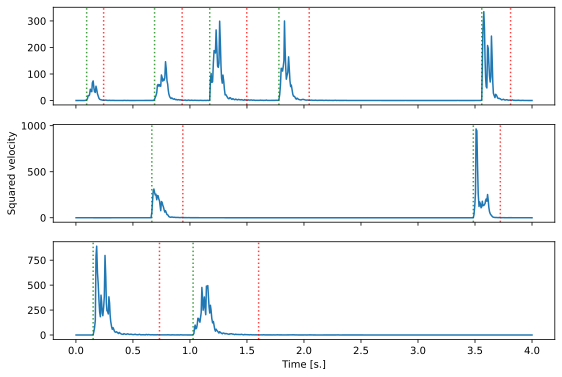

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(9, 6), sharex=True)

#Compute fish velocities for plotting
velocities_df = exp.compute_velocity()

#Plot fish velocities
for i_fish in range(exp.n_fish):   
    axes[i_fish].plot(exp.behavior_log['t'], velocities_df["vel2_f{}".format(i_fish)])
    
#Plot bout start and end times.
for idx, bout in bout_summary.iterrows():
    axes[int(bout['i_fish'])].axvline(bout['t_start'], c='green', ls=':', alpha=.75)
    axes[int(bout['i_fish'])].axvline(bout['t_end'], c='red', ls=':', alpha=.75)

axes[1].set_ylabel('Squared velocity')
axes[2].set_xlabel('Time [s.]');

---
**NOTE**

The exp.get_bout_properties() can be used directly without going through all these steps, but be aware that in this casse, all the functions will be called with default values.

---